### Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install requirements

In [ ]:
!pip install pyod

### Import requirements

In [ ]:
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
import numpy as np
import pandas as pd
from pyod.models.iforest import IForest
import time

### Load data

In [ ]:
datapath = r'/content/drive/MyDrive/dogecoin/doge_usdt_4_1_5_18.csv'
dataset = pd.read_csv(datapath, header=None)

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7
0,1617206400,0.053793,0.053549,0.053562,0.053789,223,6.125667e+05,32912.12767
1,1617206460,0.053830,0.053593,0.053792,0.053618,484,2.651230e+06,142430.65080
2,1617206520,0.053615,0.053520,0.053615,0.053560,399,1.408978e+06,75469.32434
3,1617206580,0.053637,0.053500,0.053536,0.053637,243,1.000480e+06,53576.25380
4,1617206640,0.053686,0.053567,0.053603,0.053646,241,1.534275e+06,82283.92655


### Features and labels

In [ ]:
id_c = 0
high_c = 1
low_c = 2
open_c = 3
close_c = 4
count_c = 5
amount_c = 6
volume_c = 7

increase = 1
decrease = 0

time_series = 10

In [ ]:
feature_dataset = dataset.drop(id_c, axis=1)

In [ ]:
feature_dataset.head()

,1,2,3,4,5,6,7
0,0.053793,0.053549,0.053562,0.053789,223,6.125667e+05,32912.12767
1,0.053830,0.053593,0.053792,0.053618,484,2.651230e+06,142430.65080
2,0.053615,0.053520,0.053615,0.053560,399,1.408978e+06,75469.32434
3,0.053637,0.053500,0.053536,0.053637,243,1.000480e+06,53576.25380
4,0.053686,0.053567,0.053603,0.053646,241,1.534275e+06,82283.92655


In [ ]:
# features = np.array(feature_dataset)
train_x = np.array(feature_dataset)

In [ ]:
# print(features.shape)
print(train_x.shape)

(68487, 7)


### Train dataset and test dataset

In [ ]:
# test_full_ratio = 0.2
# random_seed = 15

In [ ]:
# train_x, test_x = train_test_split(features, test_size=test_full_ratio, random_state=random_seed)

In [ ]:
# print(train_x.shape)
# print(test_x.shape)

### IForest

In [ ]:
clf = IForest()
clf.fit(train_x)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [ ]:
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_
# y_test_scores = clf.decision_function(test_x)

In [ ]:
print(y_train_pred)
print(y_train_scores)
# print(y_test_scores)

[0 0 0 ... 0 0 0]
[-0.08668086 -0.05370049 -0.07295445 ... -0.09320299 -0.10943352
 -0.10760608]


### Result

In [ ]:
anomaly = []
for i in range(len(y_train_pred)):
  if y_train_pred[i] == 1:
    anomaly.append(i)

print(len(anomaly))
print(anomaly)

6849
[853, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1145, 1146, 1148, 1149, 1150, 1152, 1153, 1154, 1155, 1158, 1159, 1160, 1161, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1192, 1193, 1194, 1195, 1196, 1197, 1200, 1201, 1202, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1222, 1223, 1239, 1240, 1242, 1243, 1244, 1245, 1247, 1252, 1255, 1258, 1260, 1262, 1263, 1264, 1265, 1267, 1282, 1285, 1288, 1289, 1290, 1291, 1295, 1296, 1299, 1306, 1317, 1324, 1325, 1338, 1343, 1344, 1345, 1347, 1348, 1351, 1352, 1353, 1354, 1355, 1356, 1405, 1413, 1434, 1456, 1468, 1469, 1470, 1471, 1476, 1477, 1479, 1482, 1553, 1556, 1566, 1576, 1579, 1580, 1721, 1723, 1724, 1727, 1730, 1920, 1921,

### Plot

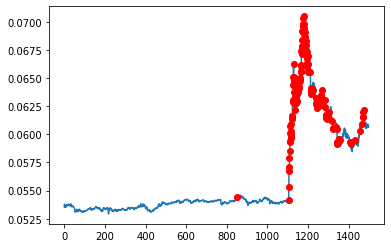

In [ ]:
plt.plot(feature_dataset[3][0:1500])
for i in range(150):
  plt.plot(anomaly[i], feature_dataset[3][anomaly[i]], color='r', marker='o', linewidth=1)

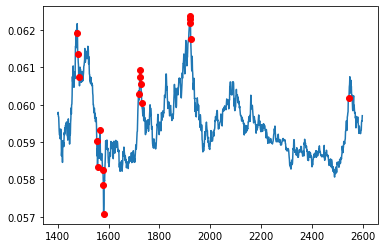

In [ ]:
plt.plot(feature_dataset[3][1400:2600])
for i in range(150, 169):
  plt.plot(anomaly[i], feature_dataset[3][anomaly[i]], color='r', marker='o', linewidth=1)

### Anomaly dataset

In [ ]:
anomaly_dataset = dataset.iloc[anomaly]
anomaly_dataset.head()

,0,1,2,3,4,5,6,7
853,1617257580,0.054423,0.054000,0.054403,0.054185,1792,9.260962e+06,501841.909
1105,1617272700,0.055550,0.054110,0.054171,0.055392,4203,2.329416e+07,1277014.825
1106,1617272760,0.057070,0.054940,0.055356,0.057056,17427,7.332755e+07,4107633.716
1107,1617272820,0.057388,0.056139,0.057056,0.056758,6958,3.753555e+07,2127935.964
1108,1617272880,0.058000,0.056705,0.056748,0.057877,9573,6.479132e+07,3721809.502


### Save dataset

In [ ]:
# savepath = r'/content/drive/MyDrive/dogecoin/doge_usdt_4_1_5_18_anomaly.csv'
# anomaly_dataset.to_csv(savepath, index = False, header = False)

### Anomaly minutes dataset

In [ ]:
time_long = time_series
feature_anomaly_list = []
label_anomaly_list = []
anomaly_period_start = 1
anomaly_period_end = 10

for i in range(len(anomaly)):
  anomaly_time = anomaly[i]

  # 1 - 15: 正常交易 16: 异常交易 取 1 - 15 做特征
  # feature_anomaly = feature_dataset.loc[anomaly_time - time_long:anomaly_time - 1]
  
  # 1 - 15: 正常交易 16: 异常交易 取 2 - 16 做特征
  feature_anomaly = feature_dataset.loc[anomaly_time - time_long + 1:anomaly_time]
  feature_anomaly = feature_anomaly.values
  feature_anomaly_list.append(feature_anomaly)

  # 1 - 15: 正常交易 16: 异常交易 取 16 做标签
  # label_anomaly = feature_dataset.loc[anomaly_time, close_c] - feature_dataset.loc[anomaly_time, open_c]
  
  # 1 - 15: 正常交易 16: 异常交易 取 17 做标签
  # next_time = anomaly_time + 1
  # label_anomaly = feature_dataset.loc[next_time, close_c] - feature_dataset.loc[next_time, open_c]

  # 1 - 15: 正常交易 16: 异常交易 取 21_close - 17_open 做标签
  period_start_time = anomaly_time + anomaly_period_start
  period_end_time = anomaly_time + anomaly_period_end
  label_anomaly = feature_dataset.loc[period_end_time, close_c] - feature_dataset.loc[period_start_time, open_c]

  if label_anomaly > 0:
    label_anomaly = increase
  else:
    label_anomaly = decrease
  label_anomaly_list.append(label_anomaly)

feature_anomaly_list = np.array(feature_anomaly_list)
label_anomaly_list = np.array(label_anomaly_list)

In [ ]:
print(feature_anomaly_list.shape)
print(label_anomaly_list.shape)

(6849, 10, 7)
(6849,)


### Train dataset and test dataset

In [ ]:
test_full_ratio = 0.2
random_seed = 15

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(feature_anomaly_list, label_anomaly_list, test_size=test_full_ratio, random_state=random_seed)

In [ ]:
# [samples_num, time_step, features]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(5479, 10, 7)
(5479,)
(1370, 10, 7)
(1370,)


### Model

In [ ]:
#LSTM architecture
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.5))
# The output layer
model.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

# Compiling the RNN
model.compile(optimizer='adam', loss='mean_squared_error')
# Fitting to the training set
start = time.time()
history = model.fit(train_x, train_y, epochs=200, batch_size=35, validation_split=0.05, verbose=1)
print('compilation time : ', time.time() - start)

Epoch 1/200
149/149 [==============================] - 12s 34ms/step - loss: 0.3191 - val_loss: 0.2481
Epoch 2/200
149/149 [==============================] - 4s 24ms/step - loss: 0.2539 - val_loss: 0.2519
Epoch 3/200
149/149 [==============================] - 4s 24ms/step - loss: 0.2534 - val_loss: 0.2474
Epoch 4/200
149/149 [==============================] - 3s 23ms/step - loss: 0.2516 - val_loss: 0.2476
Epoch 5/200
149/149 [==============================] - 4s 24ms/step - loss: 0.2529 - val_loss: 0.2478
Epoch 6/200
149/149 [==============================] - 4s 24ms/step - loss: 0.2518 - val_loss: 0.2476
Epoch 7/200
149/149 [==============================] - 4s 24ms/step - loss: 0.2509 - val_loss: 0.2476
Epoch 8/200
149/149 [==============================] - 4s 24ms/step - loss: 0.2495 - val_loss: 0.2504
Epoch 9/200
149/149 [==============================] - 4s 24ms/step - loss: 0.2506 - val_loss: 0.2496
Epoch 10/200
149/149 [==============================] - 4s 24ms/step - loss: 0.25

### Plotting Learning Curves

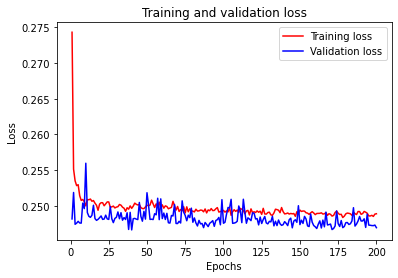

In [ ]:
def plot_history(history): 

    history_dict = history.history
    history_dict.keys()


    # acc = history.history['binary_accuracy']
    # val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'r', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
plot_history(history)

In [ ]:
trainPredict = model.predict(train_X, batch_size=batch_size)